In [4]:
#Exploratory data analysis
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/soil_moisture.csv')

# Basic statistics for soil properties and reflectance values
print(data[['soil_moisture', 'soil_temperature']].describe())
print(data.iloc[:, 4:].describe())

       soil_moisture  soil_temperature
count     679.000000        679.000000
mean       31.568336         37.498380
std         3.645354          4.660603
min        25.500000         26.400000
25%        28.255000         33.600000
50%        31.770000         36.700000
75%        34.190000         41.150000
max        42.500000         47.100000
              454         458         462         466         470         474  \
count  679.000000  679.000000  679.000000  679.000000  679.000000  679.000000   
mean     0.105377    0.073045    0.065070    0.062629    0.061873    0.061586   
std      0.028343    0.018428    0.016486    0.016021    0.016056    0.016139   
min      0.035041    0.032346    0.034085    0.037048    0.037497    0.039109   
25%      0.083775    0.059958    0.053154    0.050792    0.050016    0.049579   
50%      0.096505    0.068375    0.061662    0.059626    0.059021    0.058681   
75%      0.121039    0.081389    0.070490    0.066105    0.064790    0.064154   
m

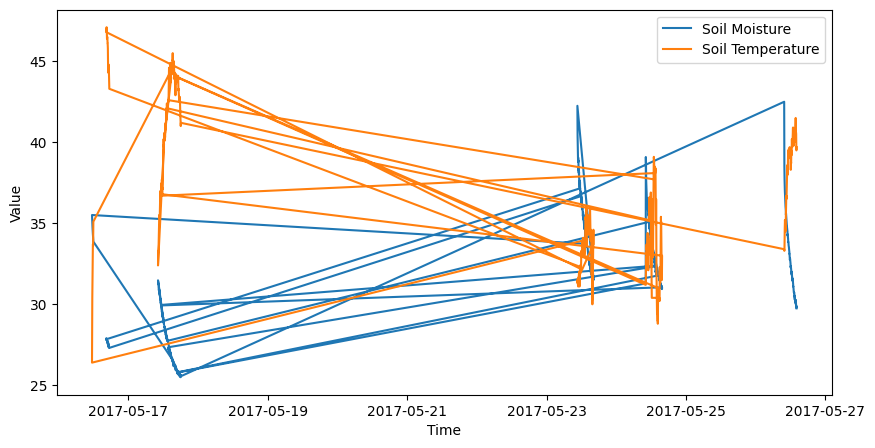

In [5]:
# Plot soil moisture and temperature over time
import matplotlib.pyplot as plt

data['datetime'] = pd.to_datetime(data['datetime'])
plt.figure(figsize=(10, 5))
plt.plot(data['datetime'], data['soil_moisture'], label='Soil Moisture')
plt.plot(data['datetime'], data['soil_temperature'], label='Soil Temperature')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [7]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = data.select_dtypes(include=['float64', 'int64']).column

scaler = MinMaxScaler()
data_normalized = data.copy()
data_normalized[numerical_cols] = scaler.fit_transform(data[numerical_cols])
print(data_normalized.head())


      index            datetime  soil_moisture  soil_temperature       454  \
0  0.000000 2017-05-23 14:06:17       0.471176          0.405797  0.315355   
1  0.001468 2017-05-23 14:08:17       0.470000          0.425121  0.297805   
2  0.002937 2017-05-23 14:10:17       0.468235          0.434783  0.305094   
3  0.004405 2017-05-23 14:12:17       0.460588          0.415459  0.287853   
4  0.005874 2017-05-23 14:14:17       0.460000          0.429952  0.300905   

        458       462       466       470       474  ...       914       918  \
0  0.244853  0.194204  0.142985  0.133216  0.099501  ...  0.019758  0.020139   
1  0.239264  0.182877  0.138443  0.123184  0.104488  ...  0.018891  0.023378   
2  0.226135  0.183289  0.137893  0.120254  0.093653  ...  0.016534  0.017100   
3  0.235581  0.182095  0.142927  0.125025  0.103708  ...  0.022675  0.029283   
4  0.239354  0.185286  0.135731  0.126960  0.106251  ...  0.019479  0.023262   

        922       926       930       934       93

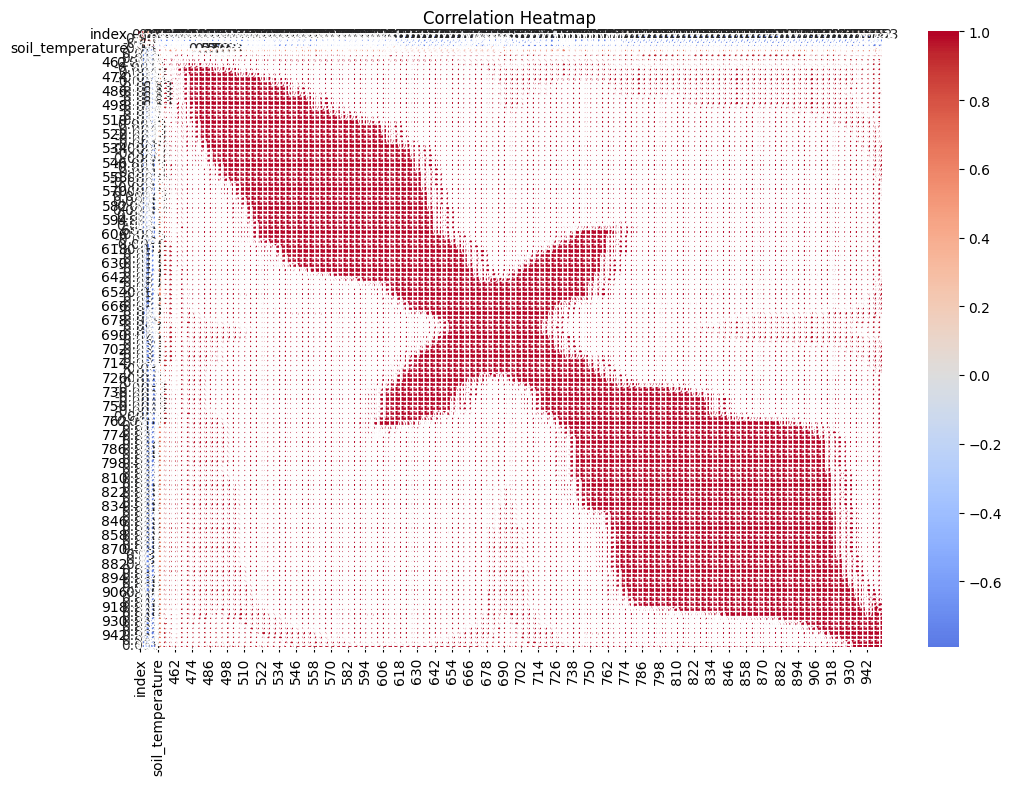

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title('Correlation Heatmap')
plt.show()

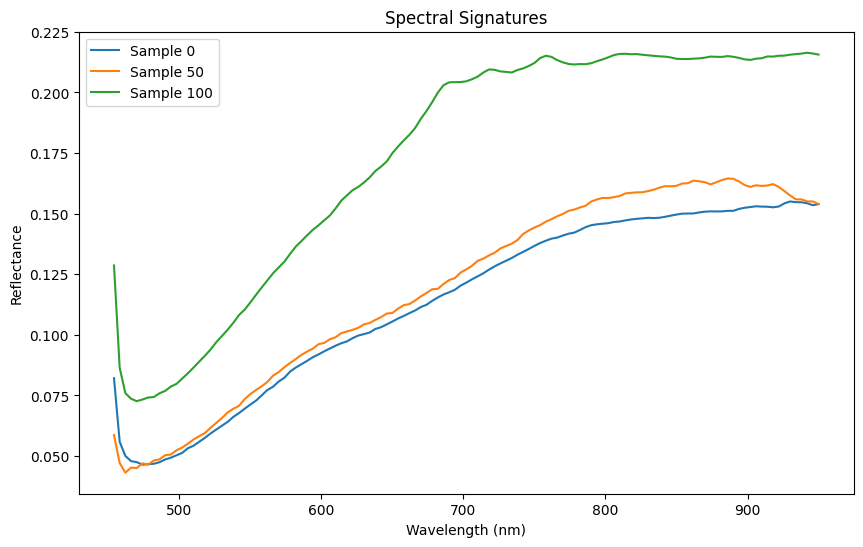

In [10]:
#Spectral Signature Analysis
# Plot spectral signatures for a few samples
wavelengths = [int(col) for col in data.columns[4:]]  # Extract wavelengths as integers
sample_indices = [0, 50, 100]  # Example indices to plot
plt.figure(figsize=(10, 6))

for idx in sample_indices:
    plt.plot(wavelengths, data.iloc[idx, 4:], label=f'Sample {idx}')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Spectral Signatures')
plt.legend()
plt.show()


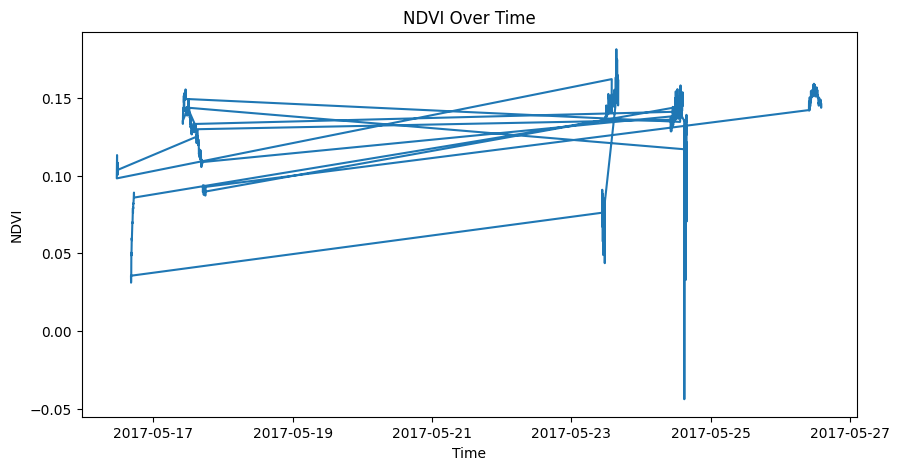

In [11]:
#NDVI = (NIR - Red) / (NIR + Red)
nir_col = '850'  # Example Near-Infrared wavelength column
red_col = '670'  # Example Red wavelength column

data['NDVI'] = (data[nir_col] - data[red_col]) / (data[nir_col] + data[red_col])

# Plot NDVI over time
plt.figure(figsize=(10, 5))
plt.plot(data['datetime'], data['NDVI'])
plt.xlabel('Time')
plt.ylabel('NDVI')
plt.title('NDVI Over Time')
plt.show()


In [12]:
#Machine Learning for prediction
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split data into features (X) and target (y)
X = data.iloc[:, 4:]  # Reflectance values as features
y = data['soil_moisture']  # Target: soil moisture

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1.1322127091176428


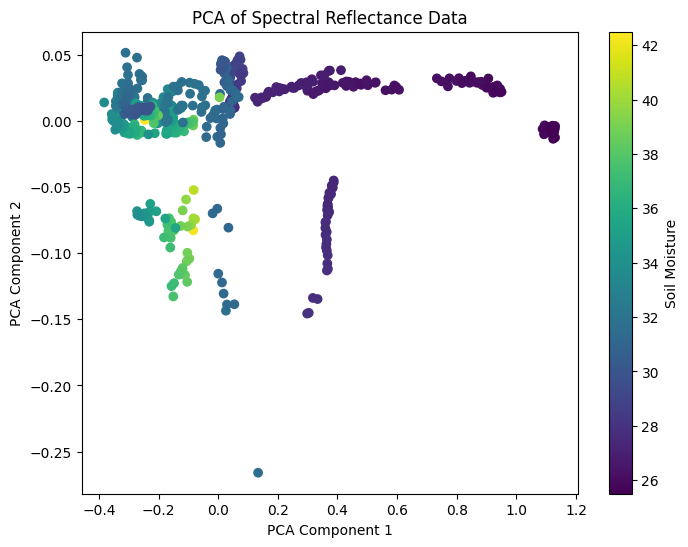

In [13]:
#Dimentionality Reduction with PCA
from sklearn.decomposition import PCA

# Apply PCA to reflectance data
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
reduced_data = pca.fit_transform(data.iloc[:, 4:])

# Scatter plot of PCA components
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data['soil_moisture'], cmap='viridis')
plt.colorbar(label='Soil Moisture')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Spectral Reflectance Data')
plt.show()


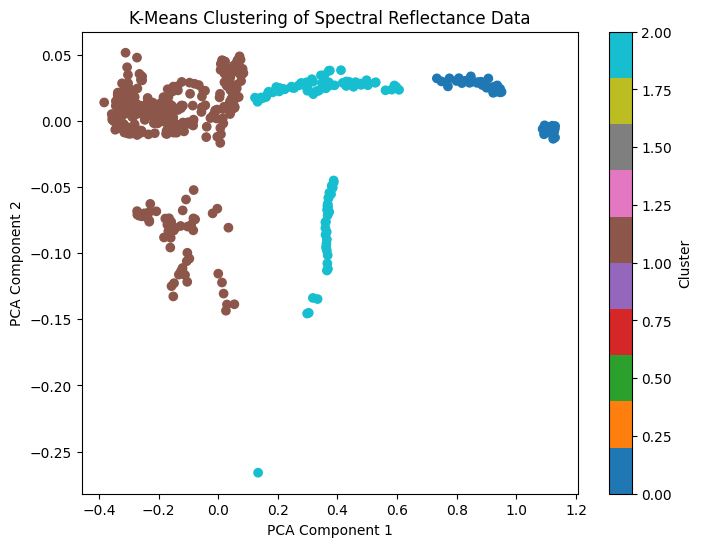

In [14]:
#Clustering
from sklearn.cluster import KMeans

# Apply K-Means to reflectance data
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(data.iloc[:, 4:])

# Visualize clusters in PCA-reduced space
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data['cluster'], cmap='tab10')
plt.colorbar(label='Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of Spectral Reflectance Data')
plt.show()

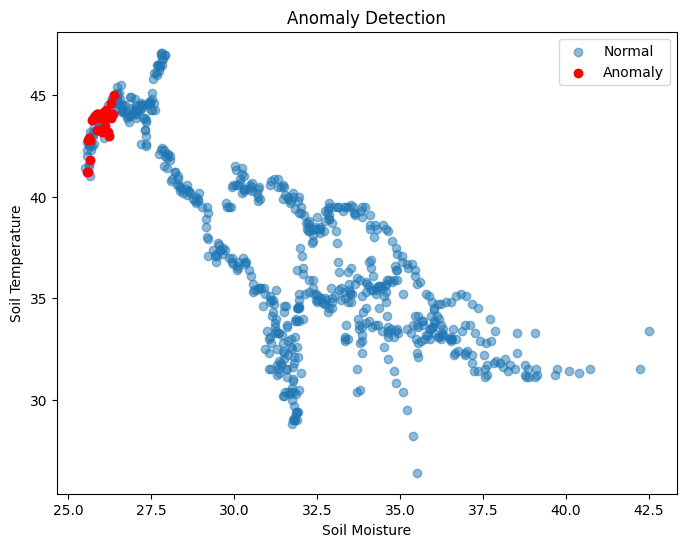

In [15]:
#Anomaly Detection
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
data['anomaly'] = iso_forest.fit_predict(data.iloc[:, 4:])

# Filter anomalies
anomalies = data[data['anomaly'] == -1]

# Plot anomalies on soil moisture vs temperature
plt.figure(figsize=(8, 6))
plt.scatter(data['soil_moisture'], data['soil_temperature'], label='Normal', alpha=0.5)
plt.scatter(anomalies['soil_moisture'], anomalies['soil_temperature'], color='red', label='Anomaly')
plt.xlabel('Soil Moisture')
plt.ylabel('Soil Temperature')
plt.legend()
plt.title('Anomaly Detection')
plt.show()
